In [1]:
import lorm
from nfft import nfft
import disc.energy_curveling_3d
from pythreejs import *
from IPython.display import display
#from ipywidgets import VBox, HBox, Checkbox, jslink
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def update_points(p):
    g1.attributes['position'].array = p.coords
    return

In [3]:
s2 = lorm.manif.Sphere2()
points = lorm.manif.ManifoldPointArrayParameterized(s2)
points_new = lorm.manif.ManifoldPointArrayParameterized(s2)

#points.coords = np.loadtxt('line.txt')
m = 1000
local_coords = np.zeros([m,2])
for i in range(m):
    local_coords[i,0] = np.pi/10+0.1*np.sin(2*np.pi*(i/m))#+0.001*np.random.randn(1)#np.arccos(((i))/(m+1))
    local_coords[i,1] = 2*np.pi*(i+0.2)/(m)#np.pi*(2*(i+1)-(m+1))/10/(1+np.sqrt(5))
points.local_coords = local_coords
#points.coords = np.random.randn(6,3)
coords = np.zeros([m,3])
#for i in range(m):
#    coords[i,0] = np.sin(2*np.pi*i/m)
#    coords[i,1] = np.cos(2*np.pi*i/m)
#    coords[i,2] = np.sqrt(5)/2 * np.cos(2*np.pi*2*i/m)
#points.coords = coords
for i in range(m):
    a = (3 + np.sqrt(3))/6
    b = 1 - a
    t = 1.*i/m
    coords[i,0] = a*np.sin(2*np.pi*t) + b*np.sin(6*np.pi*t)
    coords[i,1] = a*np.cos(2*np.pi*t) - b*np.cos(6*np.pi*t)
    coords[i,2] = np.sqrt(4*a*b)*np.cos(4*np.pi*t)
points.coords = coords
#points.coords = np.loadtxt('2design_s2.txt')

/home/grman/work/programming/git-reps/lorm/lorm/manif.py:299: RuntimeWarning: divide by zero encountered in true_divide
  local_coords[:,1] = point_coords[:,1] / ( point_coords[:,0] - np.sqrt(point_coords[:,0]**2  + point_coords[:,1]**2) )


In [4]:
N=2
m = points.coords.shape[0]
energy = disc.energy_curveling_s2.plan(m,N,1,2,T=0)
m

1000

/home/grman/.local/lib/python3.7/site-packages/pythreejs/traits.py:177: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.5, position=(3.0, 5.0,…

<IPython.core.display.Javascript object>


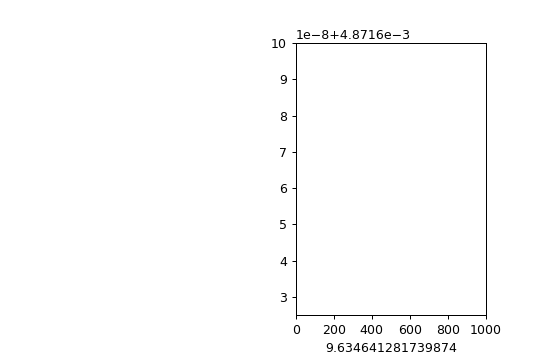

In [5]:
g1 = BufferGeometry(attributes={'position': BufferAttribute(points.coords, normalized=False) })
m1 = LineBasicMaterial(vertexColors='VertexColors', linewidth=2)
line1 = Line(g1,m1)
g2 = BufferGeometry(attributes={'position': BufferAttribute(points.coords, normalized=False) })
m2 = LineBasicMaterial(vertexColors='VertexColors', linewidth=1)
line2 = Line(g2,m2)

c = PerspectiveCamera(position=[0, 2, 2], up=[0, 2, 0],
                      children=[DirectionalLight(color='white', position=[3, 5, 1], intensity=0.5)])

scene = Scene(children=[line1, line2, c, AmbientLight(color='#777777')])

renderer = Renderer(camera=c,
                    scene=scene, 
                    controls=[OrbitControls(controlling=c)])
renderer.width =400
renderer.height =400
display(renderer)

%matplotlib notebook
fig = plt.figure()

bx = fig.add_subplot(122)
#bx.axis(np.array([0,m,0.0060895535,0.0060895545]))
bx.axis(np.array([0,m,0.00974325/2,0.0097434/2]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.local_coords)))
distance = plt.Line2D(np.linspace(0,m,m),energy._eval_lengths(points.local_coords))
bx.add_line(distance)
def update_points(p):
    distance.set_ydata(energy._eval_lengths(p.local_coords))
    bx.set_xlabel(np.sum(energy._eval_lengths(p.local_coords)))
    fig.canvas.draw()
    g1.attributes['position'].array = p.coords
    return


In [ ]:
#method = lorm.optim.SteepestDescentMethod(max_iter=100)
energy._alpha =0.000000001
energy._p  = 4
energy._T = 9.7433#9.7432864#12.8
method = lorm.optim.ConjugateGradientMethod(max_iter=150,tol_grad=1e-14)
method.listener = update_points
#points_new.coords = points.coords.copy()
for i in range(1):
    points_new = method.run(energy,points_new)

In [177]:
energy._alpha = 0
energy.f(points_new)

8.085025069240582e-17

In [145]:
tempc = points_new.coords
m2 = len(tempc)
temp = np.zeros([2*m2,3])
for i in range(m2):
    temp[2*i,:] = tempc[i,:]
for i in range(m2-1):
    temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

m = len(temp)
points.coords = temp

In [144]:
np.savetxt('2design_s2_b.txt',points_new.coords)

In [1145]:
points_new.coords.shape

(0,)

In [862]:
octa = points.coords.copy()

In [863]:
octa

array([[-0.76230989,  0.02498346, -0.64672982],
       [-0.94385854, -0.08481404, -0.31927672],
       [-0.98171329, -0.18169937,  0.05678336],
       [-0.87011109, -0.25092261,  0.42419869],
       [-0.62604237, -0.28194517,  0.72703362],
       [-0.51555932, -0.62751703,  0.58345605],
       [-0.32658705, -0.87755512,  0.35105258],
       [-0.08789485, -0.99399339,  0.06520455],
       [ 0.16417853, -0.95910518, -0.23057029],
       [ 0.39125723, -0.7782019 , -0.49124289],
       [ 0.55877056, -0.47882444, -0.67712822],
       [ 0.64121613, -0.10655029, -0.75992691],
       [ 0.62604237,  0.28194517, -0.72703362],
       [ 0.87011109,  0.25092261, -0.42419869],
       [ 0.98171329,  0.18169937, -0.05678336],
       [ 0.94385854,  0.08481404,  0.31927672],
       [ 0.76230989, -0.02498346,  0.64672982],
       [ 0.6414541 ,  0.34395196,  0.68573588],
       [ 0.42294274,  0.66052381,  0.62034486],
       [ 0.14004218,  0.87653689,  0.46051196],
       [-0.16417853,  0.95910518,  0.230